In [1]:
import numpy                as np
from astropy import units   as units

## matplotlib
from matplotlib.ticker      import AutoMinorLocator
from matplotlib             import rcParams, rc
import matplotlib           as mpl
import matplotlib.pyplot    as plt
import matplotlib.cm        as cm
from matplotlib.colors      import ListedColormap, LinearSegmentedColormap

from os import listdir
from tqdm import tqdm
from datetime import datetime


# Change the matplotlib default parameters
rcParams.update({'font.size':   8})
rcParams.update({'figure.dpi': 120})

outpath = '/lhome/silkem/ChemTorch/ChemTorch/out/'

In [2]:
name = datetime.now()
alpha = 0.5

success = listdir(outpath+'success/')
fail = listdir(outpath+'fail/')

In [8]:
for i, dir in enumerate(success):
    if dir == '2023-08-28 14:18:09.017178':
        el = i
    # else:
    #     el = 'Not found'

print('before restart 1 # success: ', el)
print('before restart 1 # fail:   ', 41969)
print('       restart 2 # success:', 18734)


before restart 1 # success:  6150
before restart 1 # fail:    41969
       restart 2 # success: 18734


In [4]:
fig, ax = plt.subplots(4,3, figsize=(16, 20))
plt.title('Results until '+str(name))

m_fail = '.'
c_fail = 'firebrick'
alpha = 0.5

dt = 0

print(">> Plotting failed models...")
for i in tqdm(range(len(fail))):
    input  = np.load(outpath+'fail/'+fail[i]+'/input.npy')
    tictoc = np.load(outpath+'fail/'+fail[i]+'/tictoc.npy')

   
    ## parameter space
    ax[0,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[1,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[2,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[3,0].plot(input[0], input[1], color = c_fail, marker = m_fail, alpha = alpha)

    ## density
    ax[0,1].plot(input[-1],input[0], color = c_fail, marker = m_fail, alpha = alpha)
    ax[0,2].plot(tictoc[0],input[0], color = c_fail, marker = m_fail, alpha = alpha)

    ## temperature
    ax[1,1].plot(input[-1],input[1], color = c_fail, marker = m_fail, alpha = alpha)
    ax[1,2].plot(tictoc[0],input[1], color = c_fail, marker = m_fail, alpha = alpha)

    ## delta
    ax[2,1].plot(input[-1],input[2], color = c_fail, marker = m_fail, alpha = alpha)
    ax[2,2].plot(tictoc[0],input[2], color = c_fail, marker = m_fail, alpha = alpha)

    ## Av
    ax[3,1].plot(input[-1],input[3], color = c_fail, marker = m_fail, alpha = alpha)
    ax[3,2].plot(tictoc[0],input[3], color = c_fail, marker = m_fail, alpha = alpha)


m_suc = '.'
c_suc = 'green'

print("\n>> Plotting succesful models...")
for i in tqdm(range(len(success))):
    input  = np.load(outpath+'success/'+success[i]+'/input.npy')
    tictoc = np.load(outpath+'success/'+success[i]+'/tictoc.npy')


    if i < 6150 and i >= 18734: 
        c_suc = 'green'
    elif i >= 6150 and i < 18734:
        c_suc = 'royalblue'
    
    ## parameter space
    ax[0,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,0].plot(input[0], input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## density
    ax[0,1].plot(input[-1],input[0], color = c_suc, marker = m_suc, alpha = alpha)
    ax[0,2].plot(tictoc[0],input[0], color = c_suc, marker = m_suc, alpha = alpha)

    ## temperature
    ax[1,1].plot(input[-1],input[1], color = c_suc, marker = m_suc, alpha = alpha)
    ax[1,2].plot(tictoc[0],input[1], color = c_suc, marker = m_suc, alpha = alpha)

    ## delta
    ax[2,1].plot(input[-1],input[2], color = c_suc, marker = m_suc, alpha = alpha)
    ax[2,2].plot(tictoc[0],input[2], color = c_suc, marker = m_suc, alpha = alpha)

    ## Av
    ax[3,1].plot(input[-1],input[3], color = c_suc, marker = m_suc, alpha = alpha)
    ax[3,2].plot(tictoc[0],input[3], color = c_suc, marker = m_suc, alpha = alpha)

print('\n>> Setting figure options...')
for i in tqdm(range(len(ax))):
    for j in tqdm(range(len(ax[i]))):
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')    
        ax[i,j].grid(True)

for i in tqdm(range(4)):
    ax[i,0].set_xlabel('num. density [$cm^{-3}$]')
    ax[i,0].set_ylabel('temp [K]')
    ax[i,1].set_xlabel('dt [s]')
    ax[i,2].set_xlabel('solve time [s]')


## density
ax[0,1].set_ylabel('num. density [$cm^{-3}$]')
ax[0,2].set_ylabel('num. density [$cm^{-3}$]')

## temperature
ax[1,1].set_ylabel('temp [K]')
ax[1,2].set_ylabel('temp [K]')

## delta
ax[2,1].set_ylabel('$\\delta$')
ax[2,2].set_ylabel('$\\delta$')

## Av
ax[3,1].set_ylabel('Av')
ax[3,2].set_ylabel('Av')

plt.show()
    

>> Plotting failed models...


 31%|███       | 12961/42034 [02:34<06:41, 72.39it/s] 

  0%|          | 0/19968 [00:00<?, ?it/s]

100%|██████████| 19968/19968 [00:49<00:00, 404.62it/s]


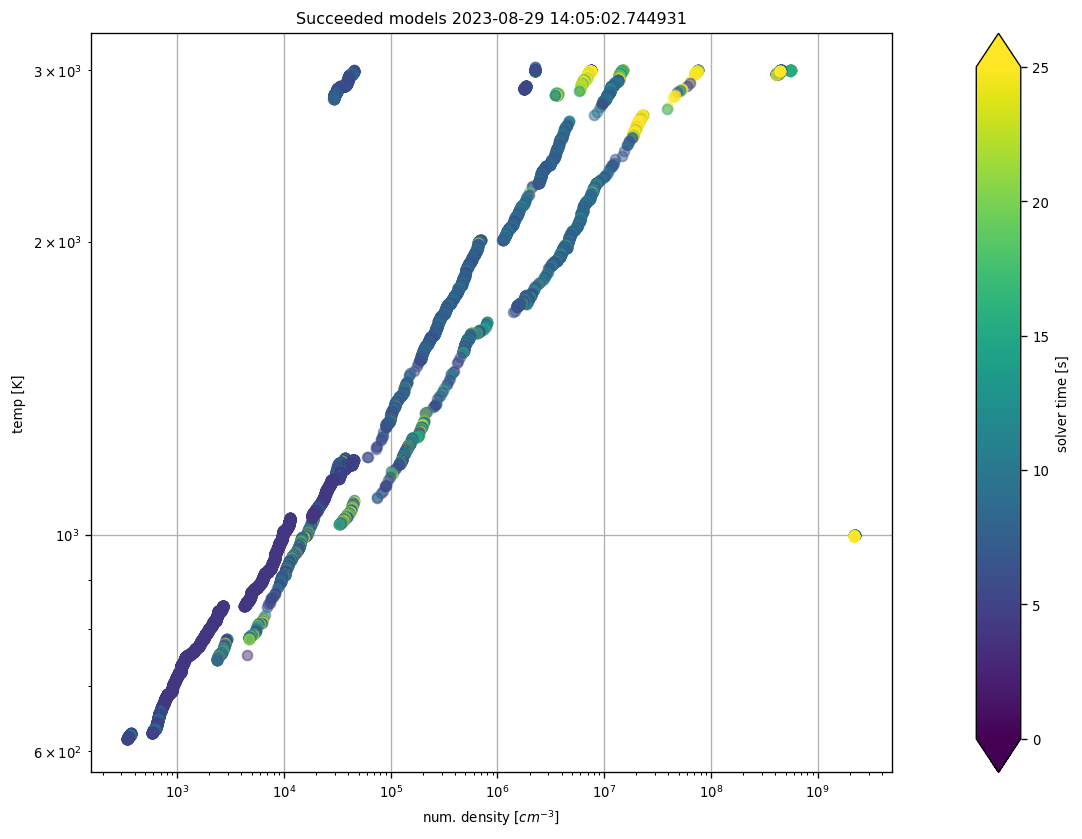

In [6]:
## plotting solve time via colormap

tmax = 25
time = np.linspace(0, 1, 10000)
colors = cm.viridis(time)

# print(colors)
m_suc = 'o'

fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

ax[0].set_title('Succeeded models '+ str(name))

# for i in range(16000,16020):
# for i in tqdm(range(5000,6000)):
for i in tqdm(range(len(success))):
    input  = np.load(outpath+'success/'+success[i]+'/input.npy')
    tictoc = np.load(outpath+'success/'+success[i]+'/tictoc.npy')


    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'

    target = tictoc[0]
    idx = np.argmin(np.abs(time*tmax - target))
    c = colors[idx]

    # print(target, time[idx]*tmax, idx, c,input[0], input[1])

    ax[0].plot(input[0], input[1], color = c, marker = m_suc, alpha = alpha)
    
## Colorbar
cmap = cm.viridis
norm =  mpl.colors.Normalize(vmin=min(time*tmax), vmax=max(time*tmax))
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax[1], orientation='vertical', label = 'solver time [s]', extend = 'both')



ax[0].set_xscale('log')
ax[0].set_yscale('log')    
ax[0].grid(True)
ax[0].set_xlabel('num. density [$cm^{-3}$]')
ax[0].set_ylabel('temp [K]')

plt.show()

[0.         0.00787402 0.01574803 0.02362205 0.03149606 0.03937008
 0.04724409 0.05511811 0.06299213 0.07086614 0.07874016 0.08661417
 0.09448819 0.1023622  0.11023622 0.11811024 0.12598425 0.13385827
 0.14173228 0.1496063  0.15748031 0.16535433 0.17322835 0.18110236
 0.18897638 0.19685039 0.20472441 0.21259843 0.22047244 0.22834646
 0.23622047 0.24409449 0.2519685  0.25984252 0.26771654 0.27559055
 0.28346457 0.29133858 0.2992126  0.30708661 0.31496063 0.32283465
 0.33070866 0.33858268 0.34645669 0.35433071 0.36220472 0.37007874
 0.37795276 0.38582677 0.39370079 0.4015748  0.40944882 0.41732283
 0.42519685 0.43307087 0.44094488 0.4488189  0.45669291 0.46456693
 0.47244094 0.48031496 0.48818898 0.49606299 0.50393701 0.51181102
 0.51968504 0.52755906 0.53543307 0.54330709 0.5511811  0.55905512
 0.56692913 0.57480315 0.58267717 0.59055118 0.5984252  0.60629921
 0.61417323 0.62204724 0.62992126 0.63779528 0.64566929 0.65354331
 0.66141732 0.66929134 0.67716535 0.68503937 0.69291339 0.7007

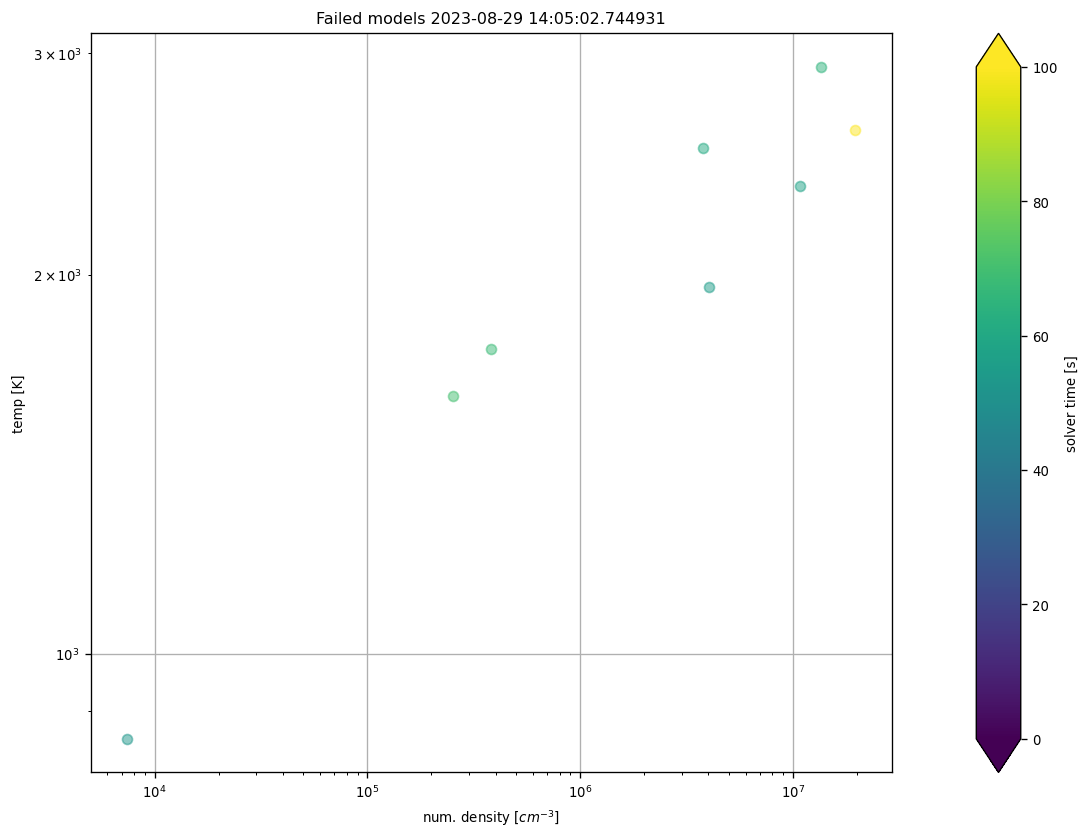

In [57]:
## plotting solve time via colormap

tmax = 100
time = np.linspace(0, 1, 128)
print(time)
# colors = cm.viridis(time)

viridis_big = mpl.colormaps['viridis']
colors = (viridis_big(time))

# print(colors)
m_suc = 'o'

fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [18,1]},figsize=(10, 8))

ax[0].set_title('Failed models '+ str(name))

for i in [16000,16020, 37920, 18479, 9843, 472, 5000, 6000]:
# for i in tqdm(range(5000,6000)):
# for i in tqdm(range(len(fail))):
    input  = np.load(outpath+'fail/'+fail[i]+'/input.npy')
    tictoc = np.load(outpath+'fail/'+fail[i]+'/tictoc.npy')


    if i < 6150:
        c_suc = 'green'
    elif i >= 6150:
        c_suc = 'royalblue'

    target = tictoc[0]
    idx = np.argmin(np.abs(time*tmax  - target))
    c = colors[idx]

    print(target, time[idx]*tmax, idx, c,np.log10(input[0]), np.log10(input[1]))

    ax[0].plot(input[0], input[1], color = c, marker = m_suc, alpha = alpha)

print('\n', min(time*tmax),max(time*tmax))

vmin = 50
vmax = 100

## Colorbar
cmap = cm.viridis
norm =  mpl.colors.Normalize(vmin=min(time*tmax), vmax=max(time*tmax), clip = True)
cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax[1], orientation='vertical', label = 'solver time [s]', extend = 'both')



ax[0].set_xscale('log')
ax[0].set_yscale('log')    
ax[0].grid(True)
ax[0].set_xlabel('num. density [$cm^{-3}$]')
ax[0].set_ylabel('temp [K]')

plt.show()

In [54]:
for c in colors:
    print(c)

[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.004874 0.329415 1.      ]
[0.267004 0.